Best position: 4.999999999999964
Best score: 1.3260751816765208e-27


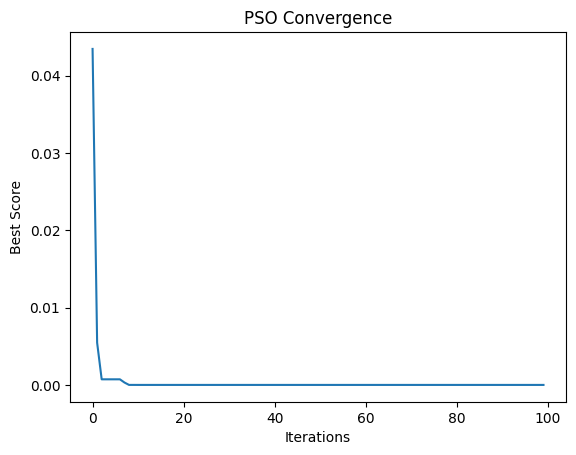

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: (x - 5)^2
def objective_function(x):
    return (x - 5) ** 2

# Particle Swarm Optimization
class Particle:
    def __init__(self, x_min, x_max):
        self.position = np.random.uniform(x_min, x_max)  # Random initial position
        self.velocity = np.random.uniform(-1, 1)  # Random initial velocity
        self.best_position = self.position
        self.best_score = objective_function(self.position)

# PSO function
def particle_swarm_optimization(objective_func, num_particles, x_min, x_max, max_iter, w=0.5, c1=1.5, c2=1.5):
    # Initialize swarm
    particles = [Particle(x_min, x_max) for _ in range(num_particles)]
    global_best_position = particles[0].best_position
    global_best_score = objective_func(global_best_position)

    score_history = []

    for _ in range(max_iter):
        for particle in particles:
            # Update personal best
            fitness = objective_func(particle.position)
            if fitness < particle.best_score:
                particle.best_position = particle.position
                particle.best_score = fitness

            # Update global best
            if fitness < global_best_score:
                global_best_position = particle.position
                global_best_score = fitness

            # Update velocity and position
            r1 = np.random.rand()
            r2 = np.random.rand()
            particle.velocity = w * particle.velocity + c1 * r1 * (particle.best_position - particle.position) + c2 * r2 * (global_best_position - particle.position)
            particle.position += particle.velocity

        score_history.append(global_best_score)

    return global_best_position, global_best_score, score_history

# PSO parameters
num_particles = 30
x_min, x_max = -10, 10
max_iter = 100

# Run PSO
best_position, best_score, score_history = particle_swarm_optimization(objective_function, num_particles, x_min, x_max, max_iter)

print(f"Best position: {best_position}")
print(f"Best score: {best_score}")

# Plot score history
plt.plot(score_history)
plt.xlabel('Iterations')
plt.ylabel('Best Score')
plt.title('PSO Convergence')
plt.show()